In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PVREDNOSTI, IZLAZ, DEFPOLJA 
# Input files (PVREDNOSTI: initial conditions are there; IZLAZ: output to be shown in graph is there; 
# DEFPOLJA: field definitions are there)

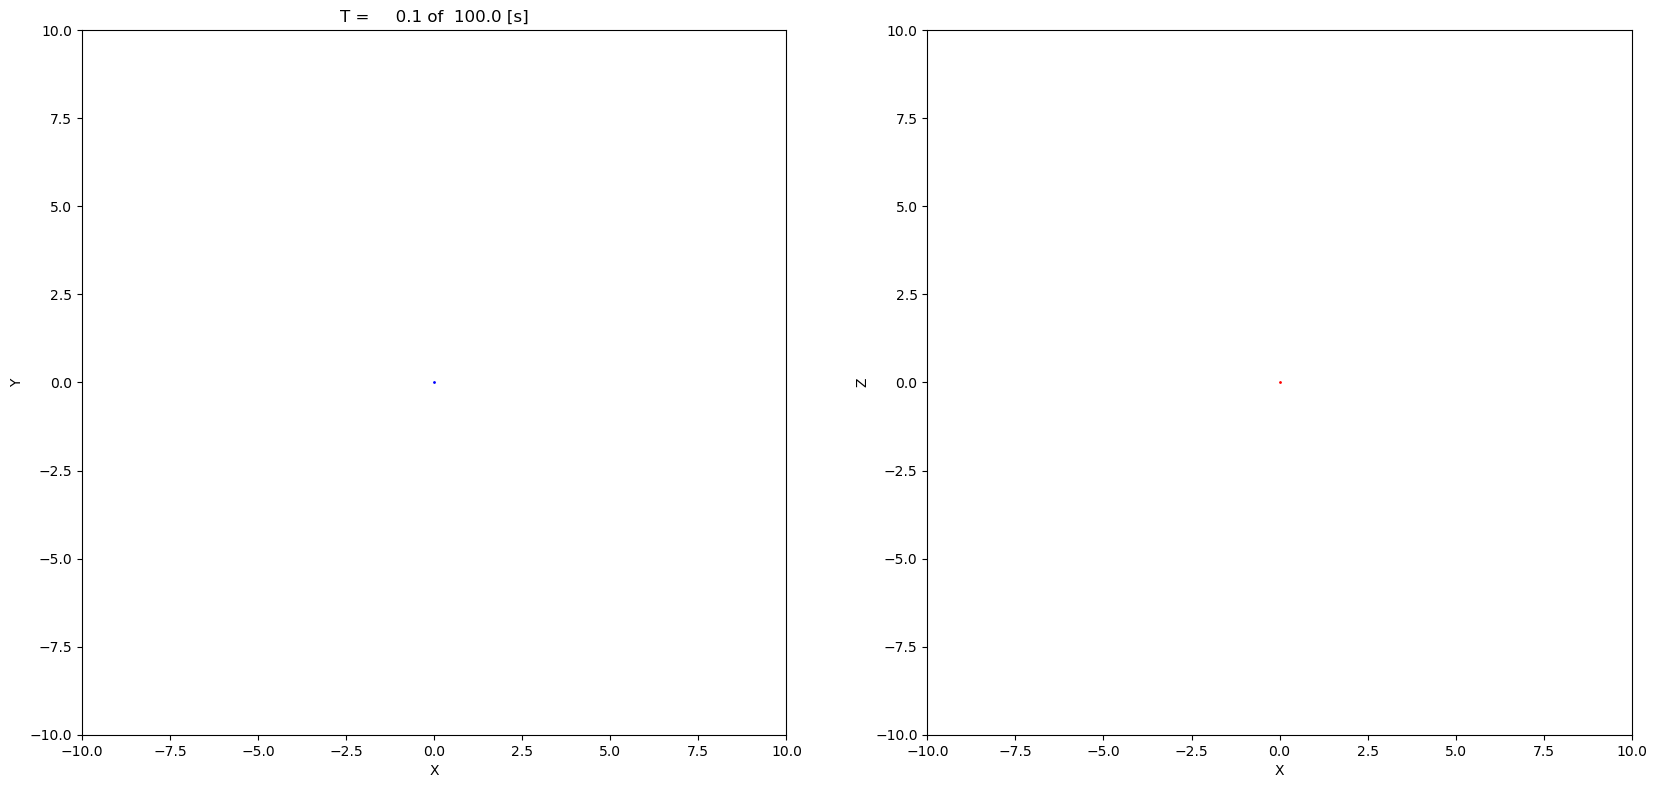

[0.00016373]


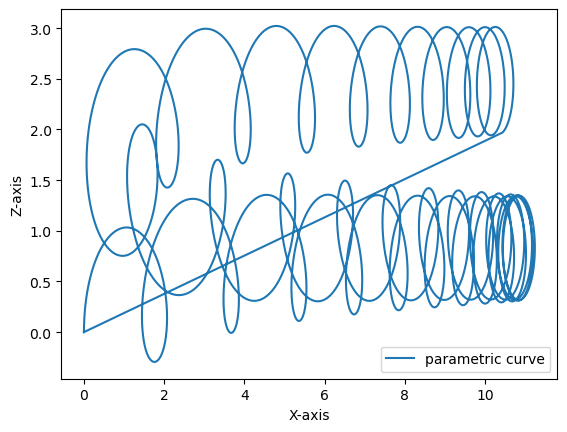

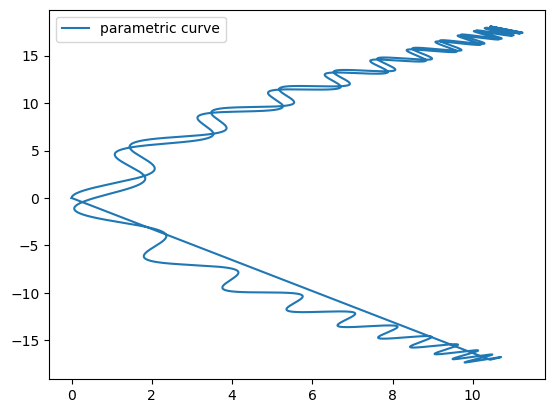

In [5]:
# Based on V. Zekovic & B. Arbutina, Nucl. Part. Phys. Proc. 297-299, 53-57 (2018) but with different 
#numerical algorithm
# Magnetic Verlet



#############################
# Input parameters
#############################

N = 1 # we use only one particle

T_sim = 100.0 # simulation duration [s] also done for 3000s
dt = 0.01 # time step
T_smp = 0.1 # times step for graphical representation

##########################
# definitions of variables
##########################

l = 0
q = np.zeros(N)
m = np.zeros(N)
x = np.zeros(N)
y = np.zeros(N)
z = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)
vz = np.zeros(N)
EPx = 0.0
EPy = 0.0
EPz = 0.0
BPx = 0.0
BPy = 0.0
BPz = 0.0   
pomx = np.zeros(N)
pomy = np.zeros(N)
pomz = np.zeros(N)

#################
# initialization
#################

t = 0.0
 
q, m, x, y, z, vx, vy, vz = PVREDNOSTI.puslovi_3(N, np)

BPx, BPy, BPz, EPx, EPy, EPz = DEFPOLJA.const_B3(x, y, z, t)

fig, sp1, sp2 = IZLAZ.init_plots(plt)


xx = np.zeros(10000000)
yy = np.zeros(10000000)
zz = np.zeros(10000000)

ii = 0

xx[ii] = x
yy[ii] = y
zz[ii] = z


###############
# Main loop
###############
# See
# https://aapt.scitation.org/doi/10.1119/10.0001876
# https://arxiv.org/abs/2008.11810
# https://www.compadre.org/PICUP/resources/Numerical-Integration/

kinetickainit = m*0.5*(vx**2.0 + vy**2.0 + vz**2.0)

while t < (T_sim - dt):

    t = t + dt

    pomx = vx + ((q*dt*0.5/m)*(EPx + (vy*BPz) - (BPy*vz)))
    pomy = vy + ((q*dt*0.5/m)*(EPy + (vz*BPx) - (BPz*vx)))
    pomz = vz + ((q*dt*0.5/m)*(EPz + (vx*BPy) - (BPx*vy)))
    #print(pomx)

    x = x + (pomx*dt)
    y = y + (pomy*dt)
    z = z + (pomz*dt)
    

    BPx, BPy, BPz, EPx, EPy, EPz = DEFPOLJA.const_B3(x, y, z, t)
    #print(x)
    pomx = pomx + ((q*dt*0.5/m)*EPx)
    pomy = pomy + ((q*dt*0.5/m)*EPy)
    pomz = pomz + ((q*dt*0.5/m)*EPz)
    #print(pomx)

    vx = ((1.0 + (((q*dt*0.5/m)**2.0)*(BPx**2.0 + BPy**2.0 + BPz**2.0)))**(-1.0))*(pomx + ((q*dt*0.5/m)*(pomy*BPz - pomz*BPy)) + (((q*dt*0.5/m)**2.0)*BPx*(pomx*BPx + pomy*BPy + pomz*BPz)))

    vy = ((1.0 + (((q*dt*0.5/m)**2.0)*(BPx**2.0 + BPy**2.0 + BPz**2.0)))**(-1.0))*(pomy + ((q*dt*0.5/m)*(pomz*BPx - pomx*BPz)) + (((q*dt*0.5/m)**2.0)*BPy*(pomx*BPx + pomy*BPy + pomz*BPz))) 

    vz = ((1.0 + (((q*dt*0.5/m)**2.0)*(BPx**2.0 + BPy**2.0 + BPz**2.0)))**(-1.0))*(pomz + ((q*dt*0.5/m)*(pomx*BPy - pomy*BPx)) + (((q*dt*0.5/m)**2.0)*BPz*(pomx*BPx + pomy*BPy + pomz*BPz)))

    ii = ii + 1
    xx[ii] = x
    yy[ii] = y
    zz[ii] = z 
    ###################################
    # show in graph
    ###################################

    l += 1

    if l*dt >= T_smp:

        l = 0.0
        IZLAZ.write_plots(sp1, sp2, plt, x, y, z, t, T_sim) # show in real time

kinetickafin = m*0.5*(vx**2.0 + vy**2.0 + vz**2.0)

mod=(kinetickainit - kinetickafin)/kinetickainit
print(mod)


# Print the rotation direction
#print("Rotation Direction:", rotation_direction)

#average_radius = np.mean(radius)
#print("Average radius of trajectory=", average_radius)


# Create a figure and an axis object
fig_xy = plt.figure()
ax_xy = fig_xy.add_subplot(111)

# Plot the parametric curve in x-y plane
ax_xy.plot(xx, yy, label='parametric curve')
ax_xy.set_xlabel('X-axis')
ax_xy.set_ylabel('Y-axis')
ax_xy.legend()
#plt.show()


# Show the plot with x-y axis
#plt.show()


# Create a figure and an axis object
fig_xz = plt.figure()
ax_xz = fig_xz.add_subplot(111)

# Plot the parametric curve in x-z plane
ax_xz.plot(xx, zz, label='parametric curve')
ax_xy.set_xlabel('X-axis')
ax_xy.set_ylabel('Z-axis')
ax_xz.legend()

# Show the plot with x-z axis
plt.show()

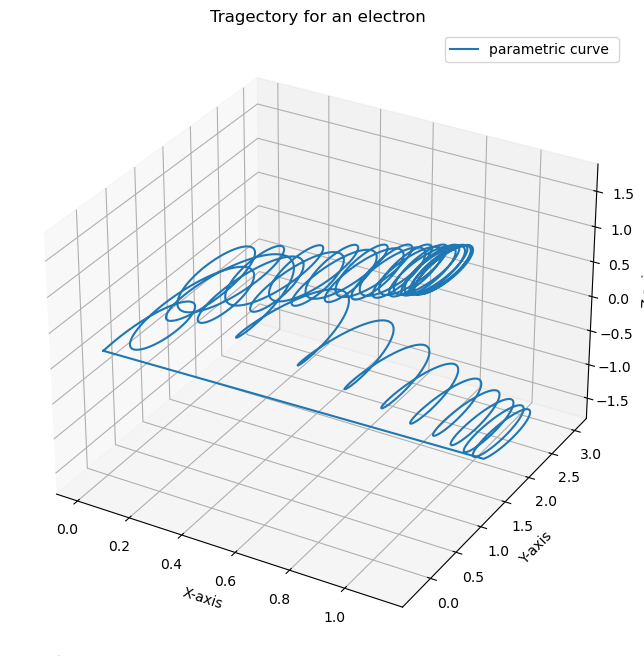

In [6]:
d=1e9
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(xx/d, yy/d, zz/d, label='parametric curve ')
#ax.plot(xx, yy, zz, label='parametric curve')
plt.title('Tragectory for an electron')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.legend()
plt.show()

In [ ]:
import plotly.graph_objs as go

fig = go.Figure(data=[go.Scatter3d(x=xx, y=yy, z=zz, mode='lines', name='parametric curve for electron')])
fig.update_layout(title='Trajectory for an electron')
fig.show()